In [271]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from string import punctuation
import os
from os import listdir
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
from plotnine import *
from pandas.api.types import CategoricalDtype
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics  

In [89]:
def file_to_string(filename):
 '''Opens the input text file and
 returns a string of all its text.'''
 file = open(filename, 'r')
 text = file.read()
 file.close()
 text = text.replace('\n', ' ')
 text = text.replace('  ', ' ')
 return text

In [102]:
# cd ..

/Users/kamilapalys/Desktop/school/data450/capstone


In [103]:
pwd

'/Users/kamilapalys/Desktop/school/data450/capstone'

In [104]:
# example of using the function

filepath = 'data/text/cnn_trump.txt'
test_txt = file_to_string(filepath)
test_txt

"Donald Trump faces more than 30 counts related to business fraud in an indictment from a Manhattan grand jury, according to two sources familiar with the case – the first time in American history that a current or former president has faced criminal charges. Trump is expected to appear in court on Tuesday. The indictment has been filed under seal and will be announced in the coming days. The charges are not publicly known at this time. Manhattan District Attorney Alvin Bragg’s office has been investigating the former president in connection with his alleged role in a hush money payment scheme and cover-up involving adult film star Stormy Daniels that dates to the 2016 presidential election. Grand jury proceedings are secret, but a source familiar with the case told CNN that a witness gave about 30 minutes of testimony before it voted to indict Trump. The decision is sure to send shockwaves across the country, pushing the American political system – which has never seen one of its ex-l

In [105]:
# initialize a dictionary to be able to find the original word from the stemmed word
stemmed_dict = {}

# how to later access the key by the value
#value = {i for i in dic if dic[i]=="n"}
#print("key by value:",value)

In [106]:
def clean_text(text, stem):
    '''Takes in a string of text cleans it by converting
    to lowercase, removing punctuation, and removing stopwords. 
    Also takes in a binary value to indicate if stemming should
    be performed. Returns the new string.'''
    if stem not in [0, 1]:
        raise ValueError("Stem must be a binary value (0 or 1)")
    ps = PorterStemmer()
    # create list of stopwords 
    stopwords_list = stopwords.words('english')
    # make the text lowercase
    text = text.lower()
    text = text.replace('—', ' ')
    # convert to ascii characters
    text = text.encode("ascii", "ignore").decode()
    for chr in text:
        # only keep characters in the string that are not punctuation symbols
        if (chr in string.punctuation or chr in string.digits):
            text = text.replace(chr, ' ')
    text = text.replace('  ', ' ')
    # stem the tokens within the text
    tokens = text.split()
    new_tokens = []
    for token in tokens[:-2]:
        # only include new token in the cleaned list if not a stopword
        if token not in stopwords_list:
            if stem == 1:
                stemmed_word = ps.stem(token)
                new_tokens.append(stemmed_word)
                # to be able to map each token to the resulting stemmed word
                if token not in stemmed_dict:
                    stemmed_dict[token] = stemmed_word
            else:
                new_tokens.append(token)
    new_tokens.append(tokens[-2])
    new_tokens.append(tokens[-1])
    cleaned_text = " ".join(new_tokens)
    cleaned_text = cleaned_text.replace('  ', ' ')
    return cleaned_text

In [107]:
# looping through all text files to apply preprocessing functions
article_docs = []
dir = os.listdir('data/text/')
dir.sort()
for filename in dir:
    filepath = os.path.join('data/text/', filename)
    if filename.split(".")[-1] == "txt":
        article_string = file_to_string(filepath)
        new_string = clean_text(article_string, 1)
        article_docs.append(new_string)

# convert the list of article strings into a binary-value dataframe
t = Tokenizer()
t.fit_on_texts(article_docs)
print(t)
encoded_docs = t.texts_to_matrix(article_docs, mode='binary')
words = [x for x in t.word_index.keys()]
binary_df = pd.DataFrame(data = encoded_docs[:, 1:], columns=words)
# List of conditions
source_conditions = [
      binary_df['abcarticle'] == 1
    , binary_df['bbcarticle'] == 1
    , binary_df['cnnarticle'] == 1
    , binary_df['foxarticle'] == 1
    , binary_df['nbcarticle'] == 1
    , binary_df['nyparticle'] == 1
    , binary_df['nytarticle'] == 1
    , binary_df['wparticle'] == 1
    , binary_df['wsjarticle'] == 1
]

# List of values to return
source_choices  = [
      "ABC News"
    , "BBC"
    , "CNN"
    , "Fox News"
    , "NBC News"
    , "New York Post"
    , "The New York Times"
    , "The Washington Post"
    , "The Wall Street Journal"
]

# List of conditions
topic_conditions = [
      binary_df['affirmativearticle'] == 1
    , binary_df['balloonarticle'] == 1
    , binary_df['bidenarticle'] == 1
    , binary_df['hamasarticle'] == 1
    , binary_df['pentagonarticle'] == 1
    , binary_df['santosarticle'] == 1
    , binary_df['tanksarticle'] == 1
    , binary_df['trumparticle'] == 1
]
# List of values to return
topic_choices  = [
      "Supreme Court Ruling on Affirmative Action"
    , "Chinese Surveillance Balloon"
    , "Biden's Low Approval Rates in Polls"
    , "The Deadliest Attack by Hamas"
    , "Pentagon Documents Leak"
    , "George Santos' Expulsion from Congress"
    , "U.S. and Germany Send Tanks to Ukraine"
    , "Trump's Indictment"
]
# create a new source column 
binary_df["article_source"] = np.select(source_conditions, source_choices, "ERROR")

# create a new topic column
binary_df["article_topic"] = np.select(topic_conditions, topic_choices, "ERROR")

binary_df.head()

,said,trump,biden,offici,mr,u,israel,presid,tank,hous,...,messr,overlap,vs,convert,marku,schreiber,riski,extort,article_source,article_topic
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Supreme Court Ruling on Affirmative Action
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Chinese Surveillance Balloon
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Biden's Low Approval Rates in Polls
3,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,The Deadliest Attack by Hamas
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Pentagon Documents Leak


In [108]:
# check what word a given stemmed word represents 
value = {i for i in stemmed_dict if stemmed_dict[i]=="marku"}
print("key by value:",value)

key by value: {'markus'}


In [270]:
article_docs

['suprem court thursday set new limit affirm action program case involv whether public privat colleg univers continu use race one factor among mani student admiss court held opinion conserv major written chief justic john robert harvard unc admiss program violat equal protect claus fourteenth amend vote unc case harvard case due recus justic ketanji brown jackson jackson serv board overs harvard earn undergradu law degre jackson justic sonia sotomayor justic elena kagan dissent two case court said blockbust case put affirm action use decad colleg univers address inequ diversifi campus spotlight suprem court repeatedli rule sinc school may consid race applic pursu educ benefit divers student bodi long one factor among mani consid school use quota system student fair admiss conserv group su harvard univers univers north carolina race consciou admiss program alleg intent discrimin toward asian american applic suprem court rule favor group decis major ramif colleg admiss process u program 

In [109]:
encoded_docs_freq = t.texts_to_matrix(article_docs, mode='count')
freq_df = pd.DataFrame(data = encoded_docs_freq[:, 1:], columns=words)
# List of conditions
source_conditions = [
      freq_df['abcarticle'] == 1
    , freq_df['bbcarticle'] == 1
    , freq_df['cnnarticle'] == 1
    , freq_df['foxarticle'] == 1
    , freq_df['nbcarticle'] == 1
    , freq_df['nyparticle'] == 1
    , freq_df['nytarticle'] == 1
    , freq_df['wparticle'] == 1
    , freq_df['wsjarticle'] == 1
]

# List of values to return
source_choices  = [
      "ABC News"
    , "BBC"
    , "CNN"
    , "Fox News"
    , "NBC News"
    , "New York Post"
    , "The New York Times"
    , "The Washington Post"
    , "The Wall Street Journal"
]

# List of conditions
topic_conditions = [
      freq_df['affirmativearticle'] == 1
    , freq_df['balloonarticle'] == 1
    , freq_df['bidenarticle'] == 1
    , freq_df['hamasarticle'] == 1
    , freq_df['pentagonarticle'] == 1
    , freq_df['santosarticle'] == 1
    , freq_df['tanksarticle'] == 1
    , freq_df['trumparticle'] == 1
]
# List of values to return
topic_choices  = [
      "Supreme Court Ruling on Affirmative Action"
    , "Chinese Surveillance Balloon"
    , "Biden's Low Approval Rates in Polls"
    , "The Deadliest Attack by Hamas"
    , "Pentagon Documents Leak"
    , "George Santos' Expulsion from Congress"
    , "U.S. and Germany Send Tanks to Ukraine"
    , "Trump's Indictment"
]
# create a new source column 
freq_df["article_source"] = np.select(source_conditions, source_choices, "ERROR")

# create a new topic column
freq_df["article_topic"] = np.select(topic_conditions, topic_choices, "ERROR")

freq_df.head()

,said,trump,biden,offici,mr,u,israel,presid,tank,hous,...,messr,overlap,vs,convert,marku,schreiber,riski,extort,article_source,article_topic
0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Supreme Court Ruling on Affirmative Action
1,30.0,0.0,5.0,28.0,0.0,15.0,0.0,4.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Chinese Surveillance Balloon
2,9.0,17.0,27.0,0.0,0.0,0.0,0.0,8.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Biden's Low Approval Rates in Polls
3,17.0,0.0,3.0,6.0,0.0,10.0,28.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,The Deadliest Attack by Hamas
4,9.0,0.0,0.0,5.0,0.0,20.0,2.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Pentagon Documents Leak


In [110]:
# create dataframe with tf-idf values

encoded_docs_tfidf = t.texts_to_matrix(article_docs, mode='tfidf')
tfidf_df = pd.DataFrame(data = encoded_docs_tfidf[:, 1:], columns=words)
# List of conditions
source_conditions = [
      tfidf_df['abcarticle'] != 0
    , tfidf_df['bbcarticle'] != 0
    , tfidf_df['cnnarticle'] != 0
    , tfidf_df['foxarticle'] != 0
    , tfidf_df['nbcarticle'] != 0
    , tfidf_df['nyparticle'] != 0
    , tfidf_df['nytarticle'] != 0
    , tfidf_df['wparticle'] != 0
    , tfidf_df['wsjarticle'] != 0
]

# List of values to return
source_choices  = [
      "ABC News"
    , "BBC"
    , "CNN"
    , "Fox News"
    , "NBC News"
    , "New York Post"
    , "The New York Times"
    , "The Washington Post"
    , "The Wall Street Journal"
]

# List of conditions
topic_conditions = [
      tfidf_df['affirmativearticle'] != 0
    , tfidf_df['balloonarticle'] != 0
    , tfidf_df['bidenarticle'] != 0
    , tfidf_df['hamasarticle'] != 0
    , tfidf_df['pentagonarticle'] != 0
    , tfidf_df['santosarticle'] != 0
    , tfidf_df['tanksarticle'] != 0
    , tfidf_df['trumparticle'] != 0
]
# List of values to return
topic_choices  = [
      "Supreme Court Ruling on Affirmative Action"
    , "Chinese Surveillance Balloon"
    , "Biden's Low Approval Rates in Polls"
    , "The Deadliest Attack by Hamas"
    , "Pentagon Documents Leak"
    , "George Santos' Expulsion from Congress"
    , "U.S. and Germany Send Tanks to Ukraine"
    , "Trump's Indictment"
]
# create a new source column 
tfidf_df["article_source"] = np.select(source_conditions, source_choices, "ERROR")

# create a new topic column
tfidf_df["article_topic"] = np.select(topic_conditions, topic_choices, "ERROR")

tfidf_df.head()

,said,trump,biden,offici,mr,u,israel,presid,tank,hous,...,messr,overlap,vs,convert,marku,schreiber,riski,extort,article_source,article_topic
0,1.827036,0.000000,0.000000,0.000000,0.0,2.313275,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Supreme Court Ruling on Affirmative Action
1,3.081563,0.000000,2.267700,4.139471,0.0,3.594586,0.000000,1.881491,0.000000,1.871958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Chinese Surveillance Balloon
2,2.238584,5.086179,3.733245,0.000000,0.0,0.000000,0.000000,2.428008,0.000000,2.128570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Biden's Low Approval Rates in Polls
3,2.683881,0.000000,1.823774,2.667558,0.0,3.201528,6.446654,1.334974,0.000000,0.891998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,The Deadliest Attack by Hamas
4,2.238584,0.000000,0.000000,2.493348,0.0,3.873465,2.519533,1.334974,3.689062,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ABC News,Pentagon Documents Leak


In [111]:
# create a list of strings where each string is all articles from one source
source_docs = []

j = 0

for i in range(9):
    source = " ".join(article_docs[j].split()[:-2]) + " " + " ".join(article_docs[j+1].split()[:-2]) + " "\
        + " ".join(article_docs[j+2].split()[:-2]) + " " + " ".join(article_docs[j+3].split()[:-2]) + " "\
        + " ".join(article_docs[j+4].split()[:-2]) + " " + " ".join(article_docs[j+5].split()[:-2]) + " "\
        + " ".join(article_docs[j+6].split()[:-2]) + " " + " ".join(article_docs[j+7].split()[:-1])
    source_docs.append(source)
    j += 8

source_docs

['suprem court thursday set new limit affirm action program case involv whether public privat colleg univers continu use race one factor among mani student admiss court held opinion conserv major written chief justic john robert harvard unc admiss program violat equal protect claus fourteenth amend vote unc case harvard case due recus justic ketanji brown jackson jackson serv board overs harvard earn undergradu law degre jackson justic sonia sotomayor justic elena kagan dissent two case court said blockbust case put affirm action use decad colleg univers address inequ diversifi campus spotlight suprem court repeatedli rule sinc school may consid race applic pursu educ benefit divers student bodi long one factor among mani consid school use quota system student fair admiss conserv group su harvard univers univers north carolina race consciou admiss program alleg intent discrimin toward asian american applic suprem court rule favor group decis major ramif colleg admiss process u program 

In [112]:
# create a dataframe of token tf-idf's with each row representing all articles of one source

# convert the list of article strings into a tf-idf-value dataframe
t = Tokenizer()
t.fit_on_texts(source_docs)
print(t)
encoded_source_docs = t.texts_to_matrix(source_docs, mode='tfidf')
words = [x for x in t.word_index.keys()]
tfidf_source_df = pd.DataFrame(data = encoded_source_docs[:, 1:], columns=words)
# List of conditions
source_conditions = [
      tfidf_source_df['abcarticle'] != 0
    , tfidf_source_df['bbcarticle'] != 0
    , tfidf_source_df['cnnarticle'] != 0
    , tfidf_source_df['foxarticle'] != 0
    , tfidf_source_df['nbcarticle'] != 0
    , tfidf_source_df['nyparticle'] != 0
    , tfidf_source_df['nytarticle'] != 0
    , tfidf_source_df['wparticle'] != 0
    , tfidf_source_df['wsjarticle'] != 0
]

# List of values to return
source_choices  = [
      "ABC News"
    , "BBC"
    , "CNN"
    , "Fox News"
    , "NBC News"
    , "New York Post"
    , "The New York Times"
    , "The Washington Post"
    , "The Wall Street Journal"
]

# create a new source column 
tfidf_source_df["article_source"] = np.select(source_conditions, source_choices, "ERROR")
tfidf_source_df.set_index('article_source', inplace=True)
tfidf_source_df.drop(['abcarticle', 'bbcarticle', 'cnnarticle', 'foxarticle',
                      'nbcarticle', 'nyparticle', 'nytarticle', 'wparticle',
                      'wsjarticle'], axis=1, inplace=True)
tfidf_source_df

,said,trump,biden,offici,mr,u,israel,presid,tank,hous,...,squelch,market,messr,overlap,vs,convert,marku,schreiber,riski,extort
article_source,,,,,,,,,,,,,,,,,,,,,
ABC News,3.591249,2.959536,3.099282,3.139834,1.173600,3.586612,2.824926,2.886101,2.886101,2.824926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BBC,3.280434,2.780642,2.335743,2.460363,3.283902,0.000000,2.460363,2.654383,2.780642,2.595992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CNN,3.698474,3.025425,2.976653,3.331000,0.693147,1.173600,3.225542,2.993325,3.126599,2.707902,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Fox News,3.055995,3.350161,2.824926,2.421451,0.693147,3.027179,2.866350,2.905262,2.625851,2.824926,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NBC News,3.670441,3.311249,2.866350,2.654383,1.654053,3.445144,3.099282,2.531753,2.886101,2.531753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
New York Post,3.340652,3.126599,2.757300,2.335743,1.654053,2.924302,3.085175,3.009575,2.421451,3.202199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The New York Times,3.584733,3.269825,2.993325,2.654383,4.166255,1.935100,1.347002,2.824926,2.564676,2.531753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Washington Post,3.785551,3.269825,3.269825,3.225542,0.000000,3.376459,2.976653,3.099282,2.976653,2.886101,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
The Wall Street Journal,3.849334,3.213976,2.866350,3.126599,3.919027,3.667067,2.905262,2.803166,2.923868,2.733076,...,1.704748,1.704748,1.704748,1.704748,1.704748,1.704748,1.704748,1.704748,1.704748,1.704748


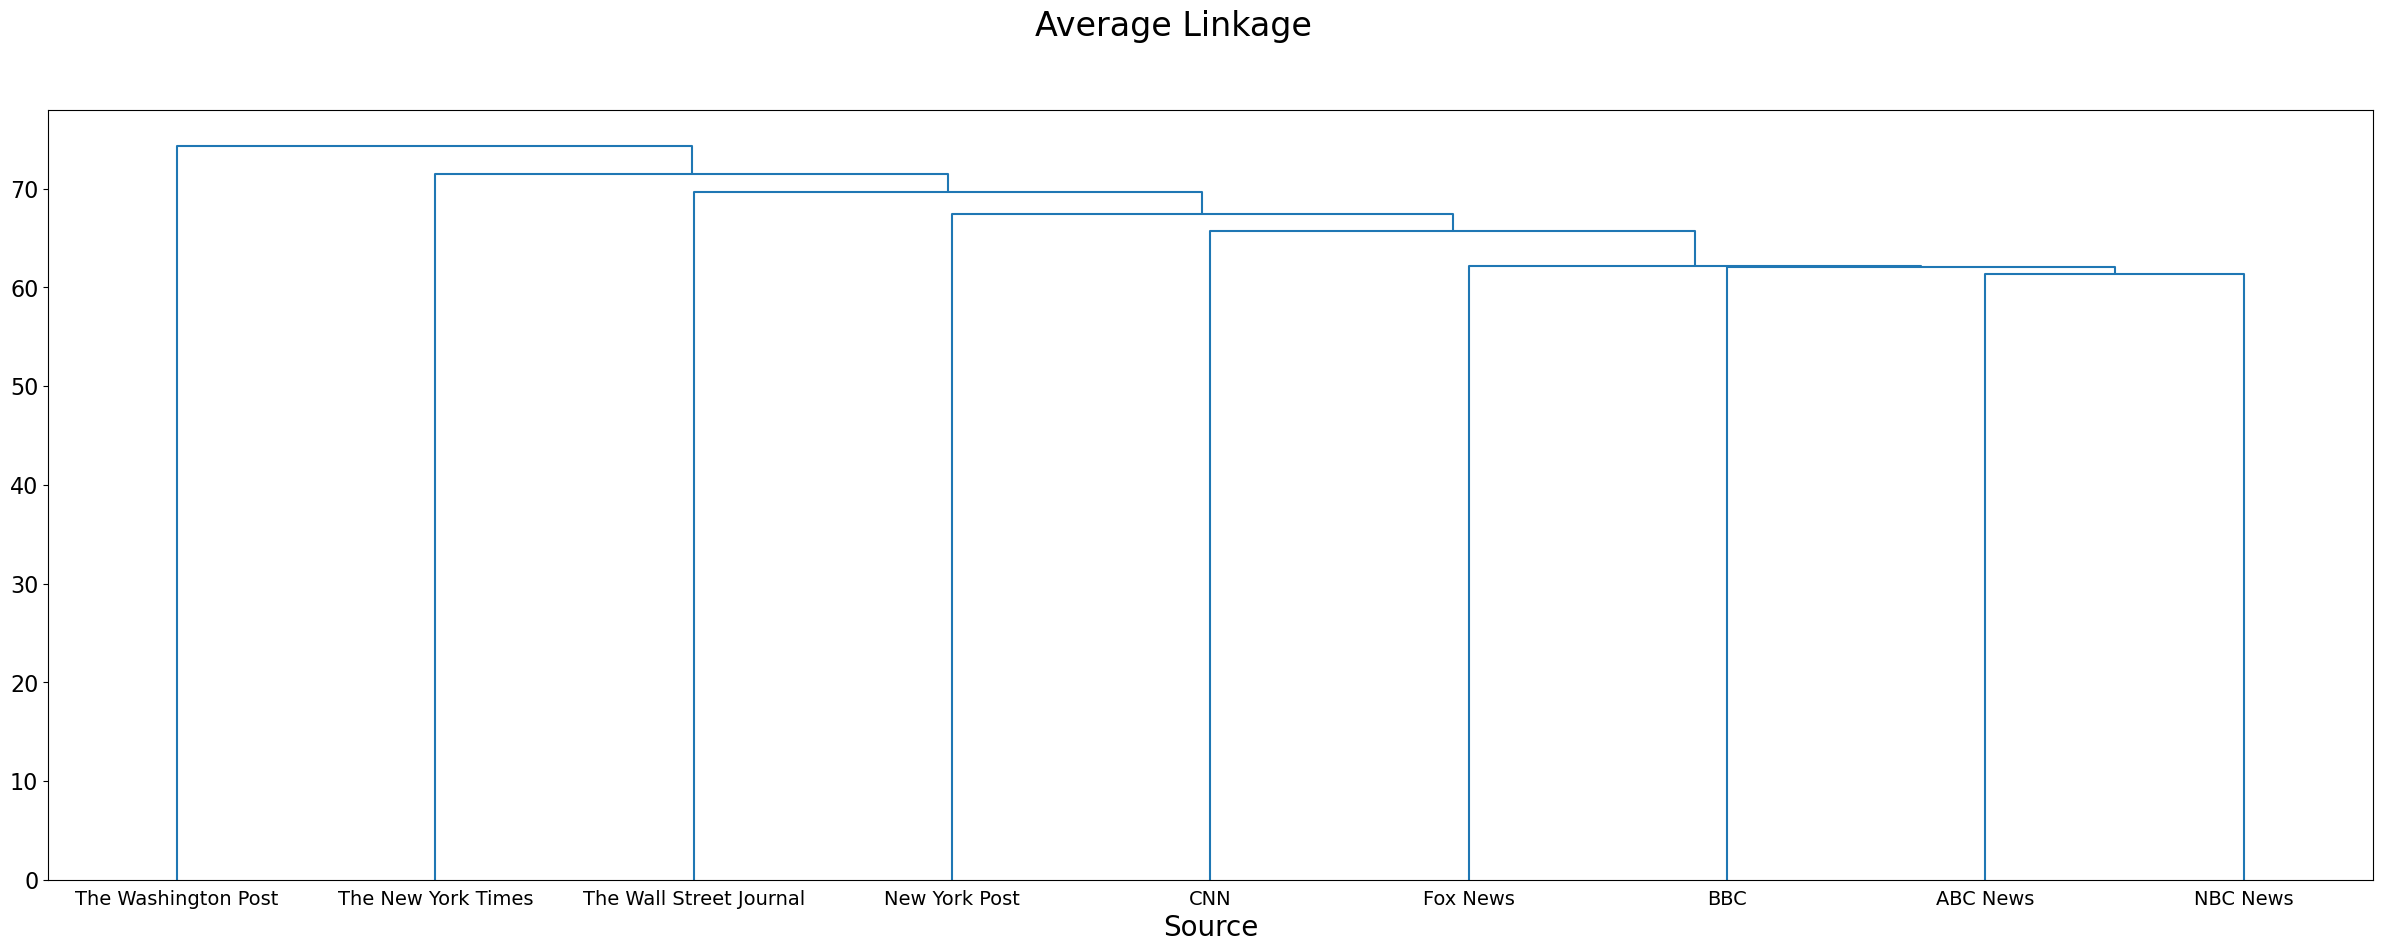

In [113]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(tfidf_source_df, 'average')
fig = plt.figure(figsize=(30, 10))
fig.suptitle("Average Linkage", fontsize=24)
plt.xlabel('Source', fontsize=20)
plt.yticks(fontsize = 16) 
dn = dendrogram(Z, labels=tfidf_source_df.index)
plt.xticks(fontsize = 14)
plt.show()

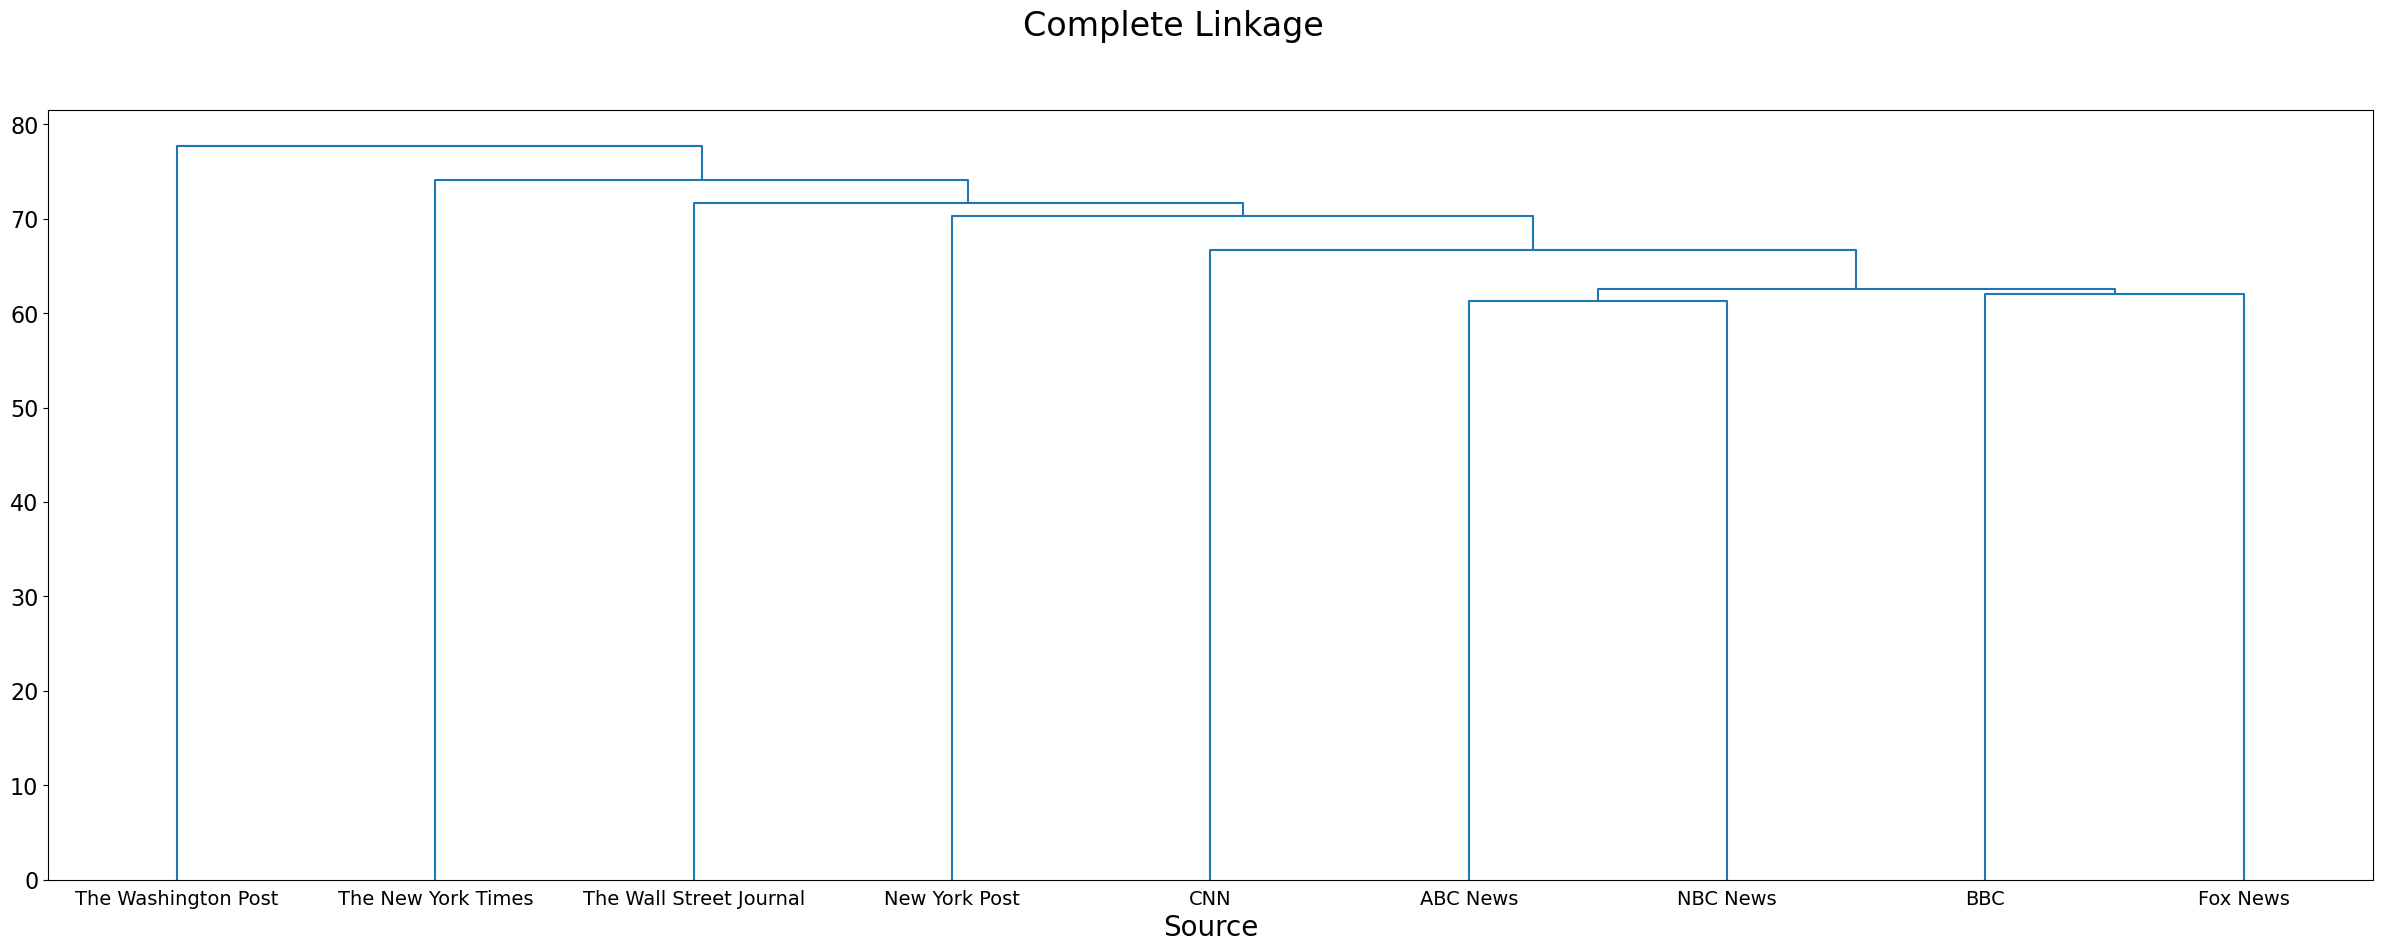

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(tfidf_source_df, 'complete')
fig = plt.figure(figsize=(30, 10))
fig.suptitle("Complete Linkage", fontsize=24)
plt.xlabel('Source', fontsize=20)
plt.yticks(fontsize = 16) 
dn = dendrogram(Z, labels=tfidf_source_df.index)
plt.xticks(fontsize = 14)
plt.show()

In [115]:
def create_wordcloud(text, title):
    '''Given a string of all text and a string
    for the title, creates a wordcloud.'''
    plt.figure()
    wc = WordCloud().generate(text)
    plt.title(title)
    plt.axis("off")
    plt.imshow(wc)

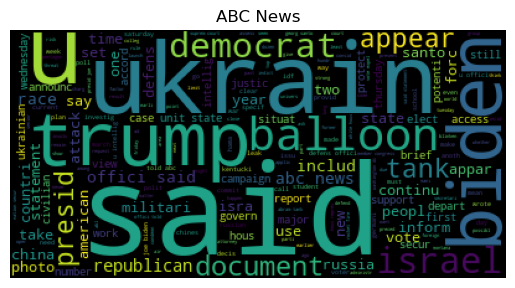

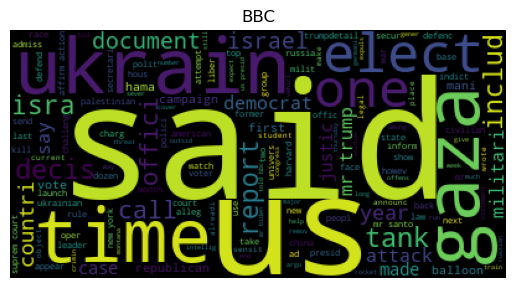

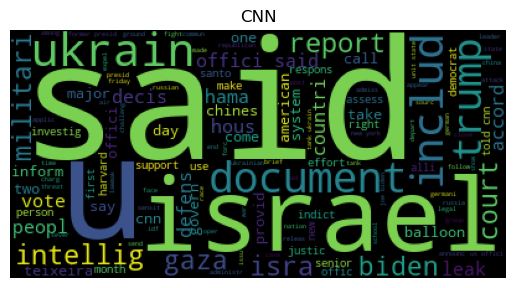

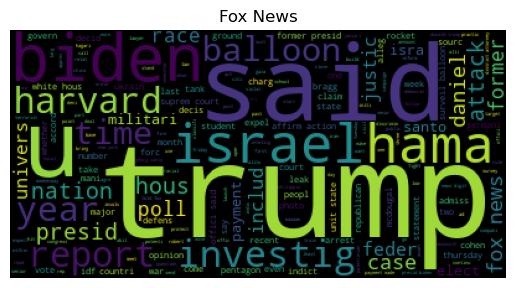

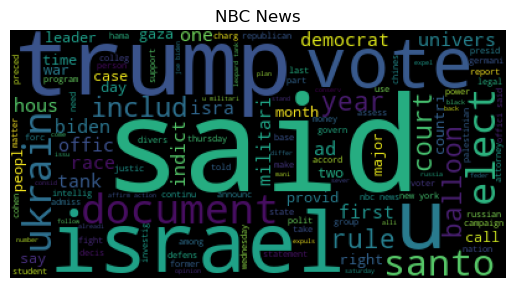

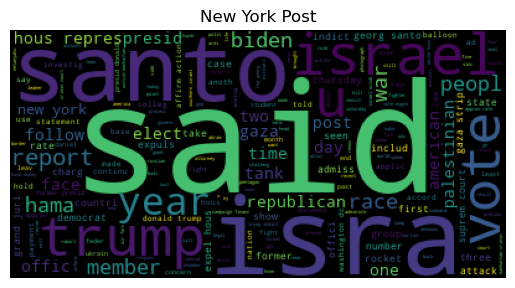

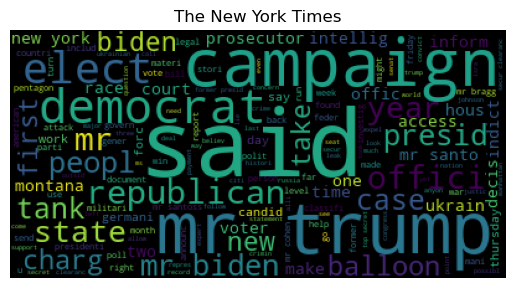

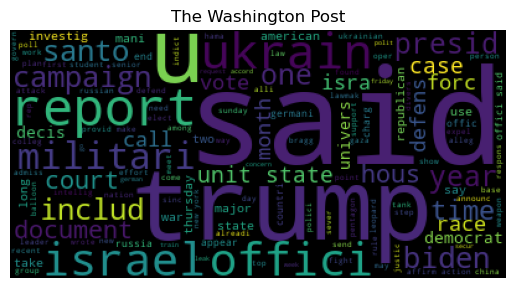

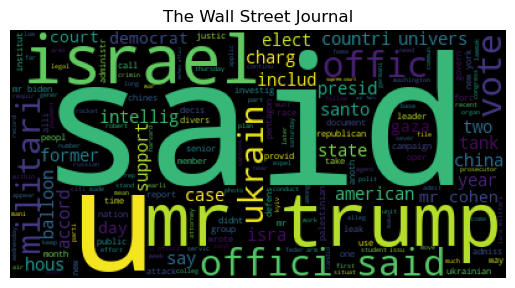

In [116]:
for i in range(len(source_docs)):
    create_wordcloud(source_docs[i], tfidf_source_df.index[i])

In [117]:
# create a list of unstemmed article document texts
# looping through all text files to apply preprocessing functions
article_docs_unstemmed = []
dir = os.listdir('data/text/')
dir.sort()
for filename in dir:
    filepath = os.path.join('data/text/', filename)
    if filename.split(".")[-1] == "txt":
        article_string = file_to_string(filepath)
        new_string = clean_text(article_string, 0)
        article_docs_unstemmed.append(new_string)

article_docs_unstemmed

['supreme court thursday set new limits affirmative action programs cases involving whether public private colleges universities continue use race one factor among many student admissions court held opinion conservative majority written chief justice john roberts harvard unc admissions programs violate equal protection clause fourteenth amendment vote unc case harvard case due recusal justice ketanji brown jackson jackson served board overseers harvard earned undergraduate law degrees jackson justice sonia sotomayor justice elena kagan dissented two cases court said blockbuster cases put affirmative action used decades colleges universities address inequality diversify campuses spotlight supreme court repeatedly ruled since schools may consider race applicants pursuing educational benefits diverse student body long one factor among many considered schools use quota system students fair admissions conservative group sued harvard university university north carolina race conscious admiss

In [118]:
# create a list of strings where each string is all articles from one source (unstemmed)
source_docs_unstemmed = []

j = 0

for i in range(9):
    source = " ".join(article_docs_unstemmed[j].split()[:-2]) + " " + " ".join(article_docs_unstemmed[j+1].split()[:-2]) + " "\
        + " ".join(article_docs_unstemmed[j+2].split()[:-2]) + " " + " ".join(article_docs_unstemmed[j+3].split()[:-2]) + " "\
        + " ".join(article_docs_unstemmed[j+4].split()[:-2]) + " " + " ".join(article_docs_unstemmed[j+5].split()[:-2]) + " "\
        + " ".join(article_docs_unstemmed[j+6].split()[:-2]) + " " + " ".join(article_docs_unstemmed[j+7].split()[:-1])
    source_docs_unstemmed.append(source)
    j += 8

source_docs_unstemmed

['supreme court thursday set new limits affirmative action programs cases involving whether public private colleges universities continue use race one factor among many student admissions court held opinion conservative majority written chief justice john roberts harvard unc admissions programs violate equal protection clause fourteenth amendment vote unc case harvard case due recusal justice ketanji brown jackson jackson served board overseers harvard earned undergraduate law degrees jackson justice sonia sotomayor justice elena kagan dissented two cases court said blockbuster cases put affirmative action used decades colleges universities address inequality diversify campuses spotlight supreme court repeatedly ruled since schools may consider race applicants pursuing educational benefits diverse student body long one factor among many considered schools use quota system students fair admissions conservative group sued harvard university university north carolina race conscious admiss

In [212]:
# calculate polarity and subjectivity scores, create dataframe

scores_df = pd.DataFrame({'source':tfidf_df['article_source'], 'topic':tfidf_df['article_topic']})

polarity_scores = []
subjectivity_scores = []

for article in article_docs_unstemmed:
    polarity_scores.append(round(TextBlob(article).sentiment.polarity, 2))
    subjectivity_scores.append(round(TextBlob(article).sentiment.subjectivity, 2))

scores_df['polarity_score'] = polarity_scores
scores_df['subjectivity_score'] = subjectivity_scores

average_topic_polarity_scores = []
average_source_polarity_scores = []

for topic in scores_df['topic'].value_counts().index:
    mean_score = round(scores_df[scores_df['topic'] == topic]['polarity_score'].mean(), 2)
    average_topic_polarity_scores.append(mean_score)

for source in scores_df['source'].value_counts().index:
    mean_score = round(scores_df[scores_df['source'] == source]['polarity_score'].mean(), 2)
    for i in range(8):
        average_source_polarity_scores.append(mean_score)

scores_df['average_polarity_for_topic'] = average_topic_polarity_scores * 9
scores_df['average_polarity_for_source'] = average_source_polarity_scores

average_topic_subjectivity_scores = []
average_source_subjectivity_scores = []

for topic in scores_df['topic'].value_counts().index:
    mean_score = round(scores_df[scores_df['topic'] == topic]['subjectivity_score'].mean(), 2)
    average_topic_subjectivity_scores.append(mean_score)

for source in scores_df['source'].value_counts().index:
    mean_score = round(scores_df[scores_df['source'] == source]['subjectivity_score'].mean(), 2)
    for i in range(8):
        average_source_subjectivity_scores.append(mean_score)

scores_df['average_subjectivity_for_topic'] = average_topic_subjectivity_scores * 9
scores_df['average_subjectivity_for_source'] = average_source_subjectivity_scores

scores_df['polarity_diff_from_topic_mean'] = scores_df['polarity_score'] - scores_df['average_polarity_for_topic']
scores_df['subjectivity_diff_from_topic_mean'] = scores_df['subjectivity_score'] - scores_df['average_subjectivity_for_topic']
scores_df['polarity_diff_from_source_mean'] = scores_df['polarity_score'] - scores_df['average_polarity_for_source']
scores_df['subjectivity_diff_from_source_mean'] = scores_df['subjectivity_score'] - scores_df['average_subjectivity_for_source']

sources_polarity_dev = []

for source in scores_df['source'].value_counts().index:
    total_dev = scores_df[scores_df['source'] == source]['polarity_diff_from_topic_mean'].sum()
    for i in range(8):
        sources_polarity_dev.append(total_dev/8)

sources_subjectivity_dev = []

for source in scores_df['source'].value_counts().index:
    total_dev = scores_df[scores_df['source'] == source]['subjectivity_diff_from_topic_mean'].sum()
    for i in range(8):
        sources_subjectivity_dev.append(total_dev/8)

scores_df['average_source_polarity_deviation_from_topic_mean'] = sources_polarity_dev
scores_df['average_source_subjectivity_deviation_from_topic_mean'] = sources_subjectivity_dev

scores_df.iloc[64:, :]

,source,topic,polarity_score,subjectivity_score,average_polarity_for_topic,average_polarity_for_source,average_subjectivity_for_topic,average_subjectivity_for_source,polarity_diff_from_topic_mean,subjectivity_diff_from_topic_mean,polarity_diff_from_source_mean,subjectivity_diff_from_source_mean,average_source_polarity_deviation_from_topic_mean,average_source_subjectivity_deviation_from_topic_mean
64,The Wall Street Journal,Supreme Court Ruling on Affirmative Action,0.07,0.39,0.11,0.04,0.40,0.36,-0.04,-0.01,0.03,0.03,-0.01,-0.02625
65,The Wall Street Journal,Chinese Surveillance Balloon,0.02,0.28,0.04,0.04,0.37,0.36,-0.02,-0.09,-0.02,-0.08,-0.01,-0.02625
66,The Wall Street Journal,Biden's Low Approval Rates in Polls,0.07,0.42,0.08,0.04,0.39,0.36,-0.01,0.03,0.03,0.06,-0.01,-0.02625
67,The Wall Street Journal,The Deadliest Attack by Hamas,0.04,0.32,0.02,0.04,0.36,0.36,0.02,-0.04,0.00,-0.04,-0.01,-0.02625
68,The Wall Street Journal,Pentagon Documents Leak,0.05,0.39,0.05,0.04,0.40,0.36,0.00,-0.01,0.01,0.03,-0.01,-0.02625
69,The Wall Street Journal,George Santos' Expulsion from Congress,-0.04,0.35,0.02,0.04,0.39,0.36,-0.06,-0.04,-0.08,-0.01,-0.01,-0.02625
70,The Wall Street Journal,U.S. and Germany Send Tanks to Ukraine,0.11,0.32,0.07,0.04,0.38,0.36,0.04,-0.06,0.07,-0.04,-0.01,-0.02625
71,The Wall Street Journal,Trump's Indictment,0.03,0.42,0.04,0.04,0.41,0.36,-0.01,0.01,-0.01,0.06,-0.01,-0.02625


In [225]:
# create a df for each source and its polarity score total deviations from the topic means

polarity_devs = pd.DataFrame({'source':scores_df['source'].value_counts().index, 
                              'polarity_dev':scores_df[scores_df['topic'] == 'Chinese Surveillance Balloon']\
                                ['average_source_polarity_deviation_from_topic_mean']})
polarity_devs['sign'] = np.where(polarity_devs['polarity_dev'] > 0, 'pos', 'neg')
polarity_devs.sort_values(by='polarity_dev', ascending=True, inplace=True)
polarity_devs.reset_index(drop=True, inplace=True)

source_order = CategoricalDtype(
    ["The New York Times", "The Wall Street Journal", "New York Post", 
     "The Washington Post", "BBC", "Fox News", "CNN", "NBC News", "ABC News"], 
    ordered=False
)
polarity_devs['source'] = polarity_devs['source'].astype(source_order)

polarity_devs

,source,polarity_dev,sign
0,The New York Times,-0.01625,neg
1,The Wall Street Journal,-0.01000,neg
2,New York Post,-0.00375,neg
3,The Washington Post,-0.00375,neg
4,BBC,0.00125,pos
5,Fox News,0.00375,pos
6,CNN,0.00750,pos
7,NBC News,0.00750,pos
8,ABC News,0.01000,pos


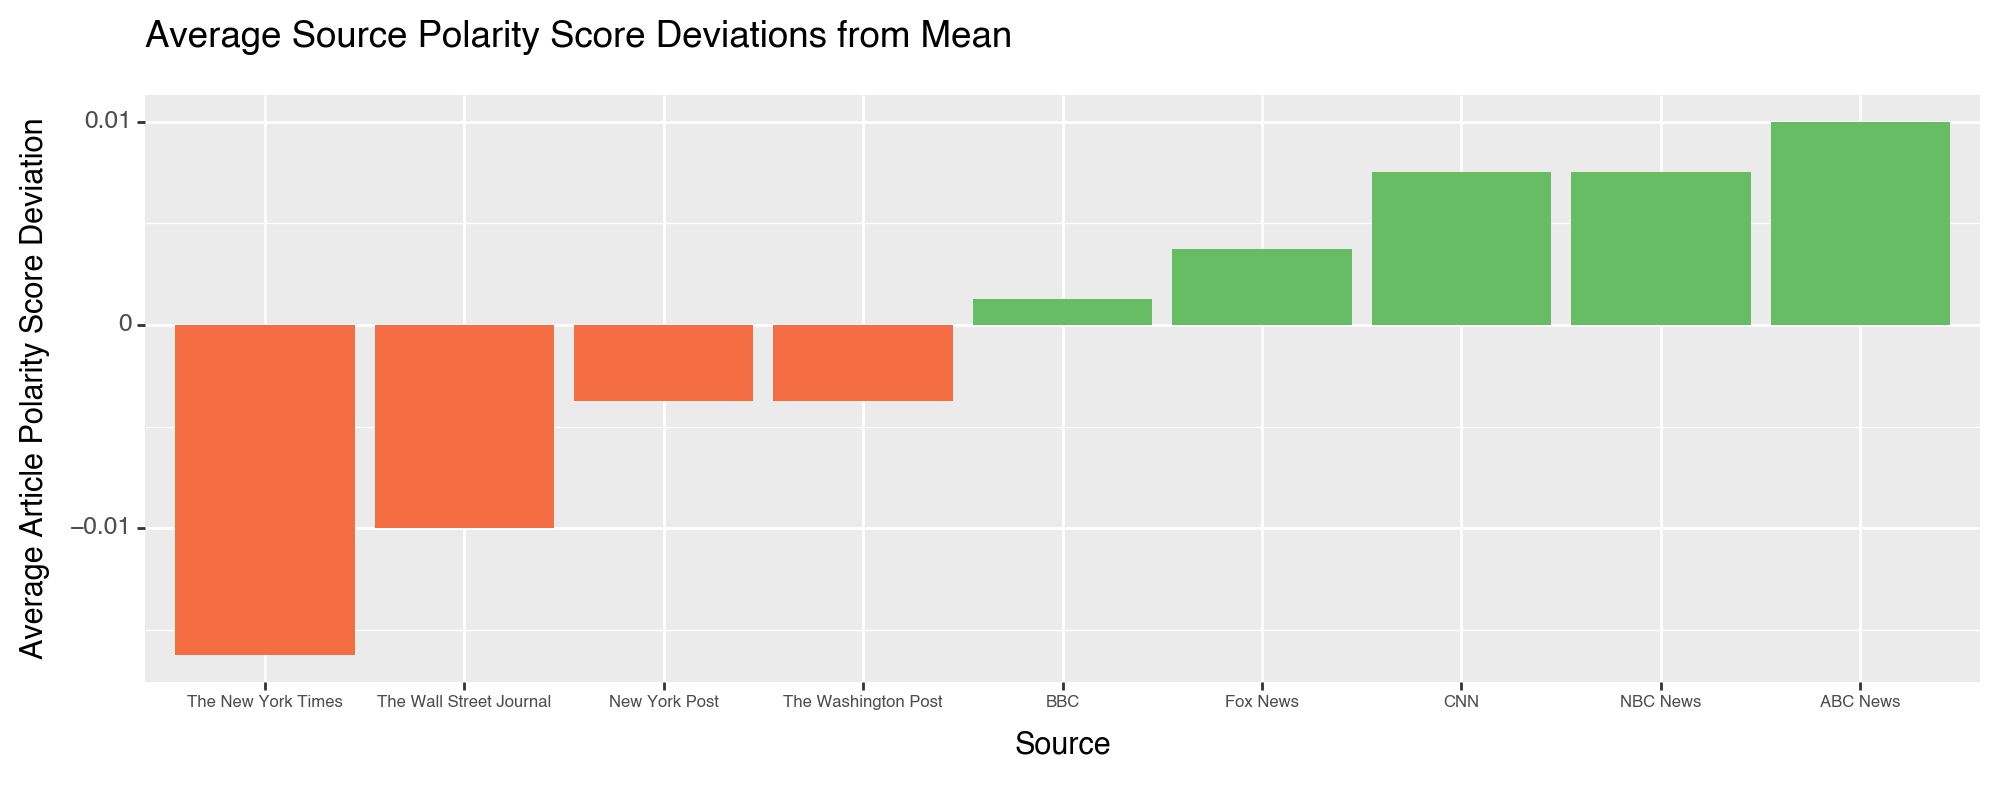

<Figure Size: (1000 x 400)>

In [226]:
# create bar chart representing how much, on average, a source's article
# deviates away from that topic's mean polarity score
# intended to show if a source tends to be more negative/positive than average, 
# even accounting for the nature of the topic

colors = {"pos":'#66bd63', "neg":'#f46d43'}  

(
ggplot(polarity_devs, aes(x="source", y="polarity_dev", fill="sign"))
+ geom_col(stat="identity")
+ labs(x='Source', y='Average Article Polarity Score Deviation', title='Average Source Polarity Score Deviations from Mean')
+ theme(figure_size = (10, 4), axis_text_x=element_text(size=6, face='bold'), legend_position = "none")
+ scale_fill_manual(values = colors)
)

In [231]:
source_avg_subj = pd.DataFrame({'source':scores_df['source'].value_counts().index, 
                              'avg_subj':scores_df[scores_df['topic'] == 'Chinese Surveillance Balloon']\
                                ['average_subjectivity_for_source']})
source_avg_subj.sort_values(by='avg_subj', ascending=True, inplace=True)
source_avg_subj.reset_index(drop=True, inplace=True)

source_order = CategoricalDtype(
    ["Fox News", "The Wall Street Journal", "CNN", 
     "The Washington Post", "BBC", "New York Post", "ABC News", "NBC News", "The New York Times"], 
    ordered=False
)
source_avg_subj['source'] = source_avg_subj['source'].astype(source_order)

source_avg_subj


,source,avg_subj
0,Fox News,0.36
1,The Wall Street Journal,0.36
2,CNN,0.37
3,The Washington Post,0.38
4,BBC,0.39
5,New York Post,0.39
6,ABC News,0.40
7,NBC News,0.41
8,The New York Times,0.42


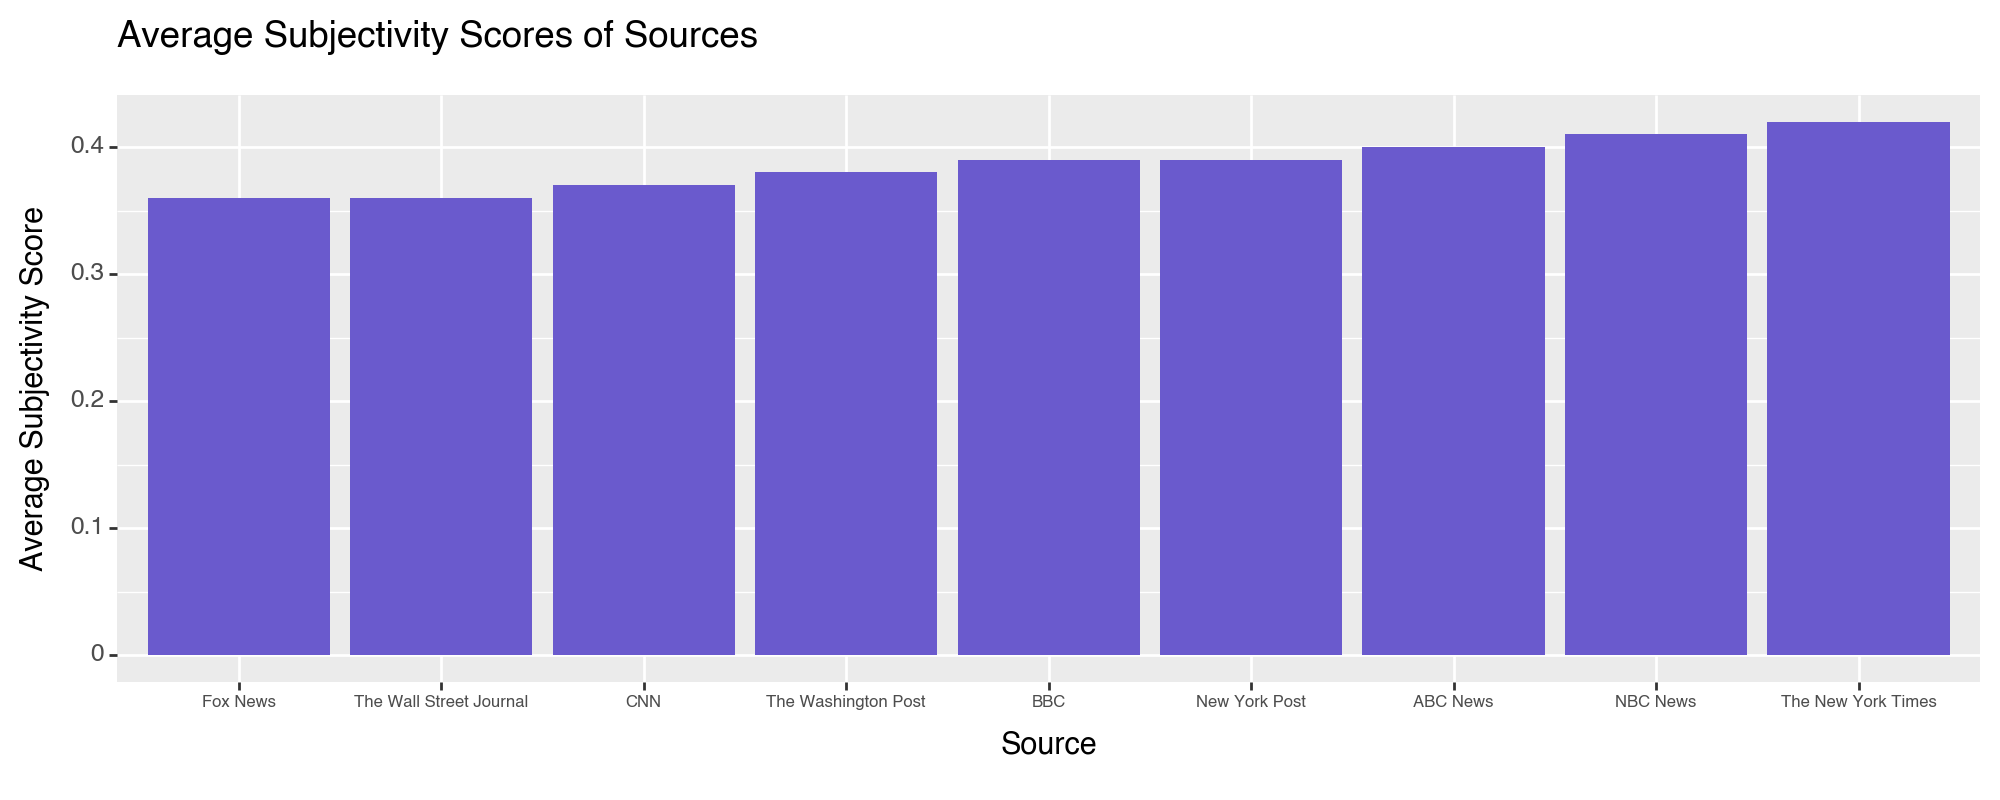

<Figure Size: (1000 x 400)>

In [234]:
(
ggplot(source_avg_subj, aes(x="source", y="avg_subj"))
+ geom_col(stat="identity", fill="slateblue")
+ labs(x='Source', y='Average Subjectivity Score', title='Average Subjectivity Scores of Sources')
+ theme(figure_size = (10, 4), axis_text_x=element_text(size=6, face='bold'), legend_position = "none")
+ scale_fill_manual(values = colors)
)

In [269]:
# create a list of tuples that contain articles that have an outlier polarity score,
# compared to other articles about the same topic

articles =[]

for topic in scores_df['topic'].value_counts().index:
    topic_df = scores_df[scores_df['topic'] == topic]
    Q1 = topic_df['polarity_score'].describe()[4]
    Q3 = topic_df['polarity_score'].describe()[6]
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    print(topic, "lower bound:", round(lower, 2), "upper bound:", round(upper,2))
    for row in topic_df.itertuples():
        if row.polarity_score < lower or row.polarity_score > upper:
            articles.append((row.source, row.topic, row.polarity_score))

print(articles)
print(len(articles))

Supreme Court Ruling on Affirmative Action lower bound: 0.1 upper bound: 0.15
Chinese Surveillance Balloon lower bound: 0.02 upper bound: 0.06
Biden's Low Approval Rates in Polls lower bound: 0.02 upper bound: 0.14
The Deadliest Attack by Hamas lower bound: -0.06 upper bound: 0.1
Pentagon Documents Leak lower bound: -0.03 upper bound: 0.13
George Santos' Expulsion from Congress lower bound: -0.02 upper bound: 0.06
U.S. and Germany Send Tanks to Ukraine lower bound: -0.03 upper bound: 0.16
Trump's Indictment lower bound: -0.04 upper bound: 0.12
[('BBC', 'Supreme Court Ruling on Affirmative Action', 0.16), ('The New York Times', 'Supreme Court Ruling on Affirmative Action', -0.02), ('The Wall Street Journal', 'Supreme Court Ruling on Affirmative Action', 0.07), ('New York Post', 'Chinese Surveillance Balloon', -0.01), ('The Wall Street Journal', 'Chinese Surveillance Balloon', 0.02), ('The Wall Street Journal', "George Santos' Expulsion from Congress", -0.04)]
6


/var/folders/52/nc0rbx9j5dz6nlj70gy7hwjr0000gn/T/ipykernel_23386/4033784056.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/52/nc0rbx9j5dz6nlj70gy7hwjr0000gn/T/ipykernel_23386/4033784056.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/52/nc0rbx9j5dz6nlj70gy7hwjr0000gn/T/ipykernel_23386/4033784056.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/52/nc0rbx9j5dz6nlj70gy7hwjr0000gn/T/ipykernel

By the outlier detection above, there are 6 articles that are considered to have an outlier polarity score for their topic. Three of those are articles from the Wall Street Journal. Also, three of the outlier articles are about the Supreme Court Ruling on Affirmative Action. 

In [275]:
# standardize the frequency df before doing PCA

freq_standardized = preprocessing.scale(freq_df.iloc[:, :-2], axis=0)  # standardize data 

# Instantiate PCA estimator 
pca = decomposition.PCA()
# fit : Run PCA
tokens_pc = pca.fit(freq_standardized)
vars(tokens_pc)

{'n_components': None,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 5306,
 '_fit_svd_solver': 'full',
 'mean_': array([-1.48029737e-16, -4.93432455e-17,  2.46716228e-17, ...,
         1.23358114e-17,  1.23358114e-17,  1.23358114e-17]),
 'noise_variance_': 0.0,
 'n_samples_': 72,
 'components_': array([[-1.88359604e-02,  8.24539565e-03,  1.56857262e-04, ...,
          2.02861862e-03,  2.02861862e-03,  2.02861862e-03],
        [-1.10805660e-02,  2.10463795e-02,  2.99679367e-03, ...,
          7.22054293e-03,  7.22054293e-03,  7.22054293e-03],
        [-5.02156260e-03,  1.16691854e-03,  4.85557051e-03, ...,
          3.85641727e-04,  3.85641727e-04,  3.85641727e-04],
        ...,
        [-6.88162567e-03,  1.14631663e-03, -7.06141147e-03, ...,
          9.22884264e-04,  9.22884264e-04,  9.22884264e-04],
        [-6.90424766e-03,  1.23208

In [283]:
PCs = pd.DataFrame(tokens_pc.components_.T[:10], 
            columns=['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7','PC8','PC9', 'PC10'])

PCs                 # PC loadings saved with Scikit-learn

ValueError: Shape of passed values is (10, 72), indices imply (10, 10)